In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dhaksana/catvsdog

Dataset URL: https://www.kaggle.com/datasets/dhaksana/catvsdog
License(s): apache-2.0
 87% 364M/418M [00:00<00:00, 543MB/s]
100% 418M/418M [00:00<00:00, 583MB/s]


In [ ]:
!unzip catvsdog.zip -d CatvsDog


Streaming output truncated to the last 5000 lines.
  inflating: CatvsDog/CatvsDog/train/dog/2507.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2509.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2510.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2511.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2514.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2515.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2518.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2520.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2521.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2523.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2525.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2527.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2529.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2532.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2533.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2537.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2539.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2541.jpg  
  inflating: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization



In [ ]:
#generator (used for  batch conversion of the large file to get  in RAM  )
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/CatvsDog/CatvsDog/train"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/CatvsDog/CatvsDog/test"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=test_ds.map(process)

In [ ]:
model = Sequential ()
model. add (Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape= (256, 256, 3)) )
model.add(BatchNormalization())
model. add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Conv2D(64, kernel_size=(3,3), padding='valid', activation= 'relu') )
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Flatten())
model. add (Dense(128, activation='relu'))
model.add(Dropout(0.1))
model. add (Dense(64, activation='relu'))
model.add(Dropout(0.1))
model. add (Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model. compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'],jit_compile=True)

In [ ]:
history = model.fit (train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.6465 - loss: 2.5160 - val_accuracy: 0.5376 - val_loss: 1.7828
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.7445 - loss: 0.5845 - val_accuracy: 0.5961 - val_loss: 0.9385
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.7831 - loss: 0.4791 - val_accuracy: 0.7157 - val_loss: 0.5906
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 45s 162ms/step - accuracy: 0.8190 - loss: 0.4131 - val_accuracy: 0.7376 - val_loss: 0.5635
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 152ms/step - accuracy: 0.8423 - loss: 0.3622 - val_accuracy: 0.7293 - val_loss: 0.5914
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - accuracy: 0.8569 - loss: 0.3266 - val_accuracy: 0.7729 - val_loss: 0.5277
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 44s 162ms/step - accuracy: 0.8854 - loss: 0.2727 - val_accuracy: 0.7681 - val_loss: 0.7206
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.9076 - loss: 0

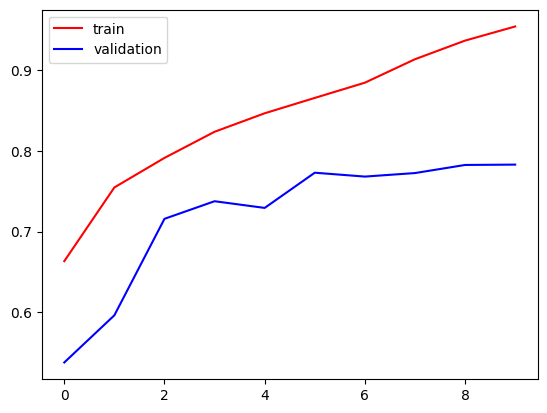

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train' )
plt.plot (history.history['val_accuracy'], color= 'blue', label='validation')
plt. legend()
plt.show()

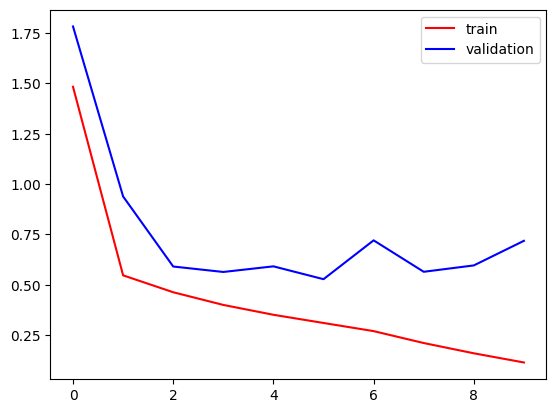

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red',label='train' )
plt.plot (history.history['val_loss'], color= 'blue', label='validation')
plt. legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/dog.jpg')

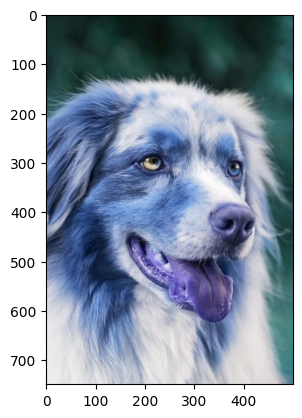

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image=cv2.resize(test_image,(256,256))

In [ ]:
test_input=test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [38]:
test_image=cv2.imread('/content/cat.jpg')
test_image=cv2.resize(test_image,(256,256))
test_input=test_image.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.]], dtype=float32)